In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC  
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve, auc , f1_score
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

In [ ]:
import pandas as pd
x_train_ori = pd.read_csv("../../data/x_train_ori.csv")
x_train_ori.head()

,InscClaimAmtReimbursed,DeductibleAmtPaid,Gender,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,...,IPAnnualReimbursementAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Is_Alive,Claim_Duration,Admitted_Duration,Bene_Age,Race_2,Race_3,Race_5
0,5.525612,0.000000,0.000000,0.000000,12.000000,12.000000,1.000000,0.000000,0.000000,0.000000,...,4.664106,7.624124,5.332859,1.0,0.000000,0.000000,74.350000,0.000000,0.000000,0.000000
1,3.961804,1.162413,0.333333,0.166667,12.000000,12.000000,0.666667,0.583333,0.333333,0.083333,...,5.461010,7.291025,6.276063,1.0,0.333333,0.250000,74.516667,0.083333,0.000000,0.000000
2,4.662761,0.000000,0.375000,0.312500,12.000000,12.000000,0.437500,0.687500,0.562500,0.125000,...,2.895693,7.346198,5.545476,1.0,2.562500,0.000000,68.131250,0.187500,0.000000,0.000000
3,4.780181,0.709673,0.391304,0.205274,11.940128,11.935139,0.429081,0.612972,0.440485,0.160371,...,2.852481,6.922563,5.658661,1.0,1.994298,0.497505,75.368140,0.006415,0.012830,0.001426
4,4.112503,0.214173,0.440678,0.203390,11.796610,11.966102,0.389831,0.661017,0.491525,0.152542,...,3.136439,6.981401,5.751723,1.0,1.576271,0.000000,73.357627,0.067797,0.050847,0.000000


In [ ]:
x_train_graph = pd.read_csv("../../data/x_train_graph_features.csv")
x_train_graph.head()

,Provider_degree,Provider_closeness_centrality,Provider_eigenvector_centrality,Provider_pagerank,AttendingPhysician_degree,AttendingPhysician_closeness_centrality,AttendingPhysician_eigenvector_centrality,AttendingPhysician_pagerank
0,1.0,0.000014,-4.041293e-20,0.000014,1.000000,0.000014,-8.948438e-21,0.000014
1,9.0,0.000124,-9.632725e-19,0.000063,1.000000,0.000066,-2.615565e-19,0.000008
2,1.0,0.000014,-1.844673e-19,0.000014,1.000000,0.000014,2.908017e-19,0.000014
3,100.0,0.170556,2.755025e-02,0.000579,2.662865,0.140279,2.432405e-03,0.000016
4,38.0,0.118946,7.172974e-05,0.000227,1.084746,0.105166,5.110236e-05,0.000008


In [ ]:
x_train_ori = pd.concat([x_train_ori, x_train_graph], axis = 1)
print(x_train_ori.shape)
x_train_ori.head()

(4328, 35)


,InscClaimAmtReimbursed,DeductibleAmtPaid,Gender,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,...,Race_3,Race_5,Provider_degree,Provider_closeness_centrality,Provider_eigenvector_centrality,Provider_pagerank,AttendingPhysician_degree,AttendingPhysician_closeness_centrality,AttendingPhysician_eigenvector_centrality,AttendingPhysician_pagerank
0,5.525612,0.000000,0.000000,0.000000,12.000000,12.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.0,0.000014,-4.041293e-20,0.000014,1.000000,0.000014,-8.948438e-21,0.000014
1,3.961804,1.162413,0.333333,0.166667,12.000000,12.000000,0.666667,0.583333,0.333333,0.083333,...,0.000000,0.000000,9.0,0.000124,-9.632725e-19,0.000063,1.000000,0.000066,-2.615565e-19,0.000008
2,4.662761,0.000000,0.375000,0.312500,12.000000,12.000000,0.437500,0.687500,0.562500,0.125000,...,0.000000,0.000000,1.0,0.000014,-1.844673e-19,0.000014,1.000000,0.000014,2.908017e-19,0.000014
3,4.780181,0.709673,0.391304,0.205274,11.940128,11.935139,0.429081,0.612972,0.440485,0.160371,...,0.012830,0.001426,100.0,0.170556,2.755025e-02,0.000579,2.662865,0.140279,2.432405e-03,0.000016
4,4.112503,0.214173,0.440678,0.203390,11.796610,11.966102,0.389831,0.661017,0.491525,0.152542,...,0.050847,0.000000,38.0,0.118946,7.172974e-05,0.000227,1.084746,0.105166,5.110236e-05,0.000008


In [ ]:
y_train_ori = pd.read_csv("../../data/y_train_ori.csv")
y_train_ori.head()

,PotentialFraud
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0


In [ ]:
x_valid_ori = pd.read_csv("../../data/x_valid_ori.csv")
x_valid_ori.head()

,InscClaimAmtReimbursed,DeductibleAmtPaid,Gender,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,...,IPAnnualReimbursementAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Is_Alive,Claim_Duration,Admitted_Duration,Bene_Age,Race_2,Race_3,Race_5
0,4.748306,0.859462,0.451852,0.192593,11.911111,11.866667,0.340741,0.607407,0.348148,0.133333,...,2.853985,7.008135,5.556642,1.0,1.762963,0.725926,74.104444,0.096296,0.014815,0.014815
1,4.004128,0.375905,0.416667,0.333333,12.000000,12.000000,0.583333,0.833333,0.333333,0.416667,...,0.000000,5.986927,5.640768,1.0,0.000000,0.000000,72.233333,0.000000,0.333333,0.000000
2,4.091386,0.132163,0.333333,0.095238,12.000000,11.809524,0.396825,0.492063,0.206349,0.142857,...,1.771407,6.182875,5.099548,1.0,0.984127,0.000000,71.195238,0.365079,0.015873,0.000000
3,9.068188,6.974479,0.714286,0.142857,12.000000,10.285714,0.571429,0.714286,0.428571,0.000000,...,9.268732,5.126291,3.962215,1.0,3.857143,3.857143,75.985714,0.142857,0.000000,0.000000
4,4.293143,0.297367,0.357143,0.178571,12.000000,12.000000,0.464286,0.642857,0.357143,0.142857,...,2.776824,7.217971,6.102226,1.0,1.071429,0.000000,75.339286,0.142857,0.000000,0.000000


In [ ]:
x_valid_graph = pd.read_csv("../../data/x_valid_graph_features.csv")
x_valid_graph.head()

,Provider_degree,Provider_closeness_centrality,Provider_eigenvector_centrality,Provider_pagerank,AttendingPhysician_degree,AttendingPhysician_closeness_centrality,AttendingPhysician_eigenvector_centrality,AttendingPhysician_pagerank
0,38.0,0.121936,2.934586e-05,0.000228,1.022222,0.106283,7.145873e-06,0.000007
1,4.0,0.000050,-3.573176e-19,0.000030,1.000000,0.000028,3.039260e-19,0.000008
2,8.0,0.121948,2.842731e-05,0.000050,1.190476,0.113157,1.593315e-04,0.000008
3,1.0,0.121858,2.929642e-05,0.000007,3.000000,0.143396,8.647938e-04,0.000016
4,3.0,0.121916,9.743541e-05,0.000015,3.321429,0.143473,9.586845e-04,0.000015


In [ ]:
x_valid_ori = pd.concat([x_valid_ori, x_valid_graph], axis = 1)
print(x_valid_ori.shape)
x_valid_ori.head()

(541, 35)


,InscClaimAmtReimbursed,DeductibleAmtPaid,Gender,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,...,Race_3,Race_5,Provider_degree,Provider_closeness_centrality,Provider_eigenvector_centrality,Provider_pagerank,AttendingPhysician_degree,AttendingPhysician_closeness_centrality,AttendingPhysician_eigenvector_centrality,AttendingPhysician_pagerank
0,4.748306,0.859462,0.451852,0.192593,11.911111,11.866667,0.340741,0.607407,0.348148,0.133333,...,0.014815,0.014815,38.0,0.121936,2.934586e-05,0.000228,1.022222,0.106283,7.145873e-06,0.000007
1,4.004128,0.375905,0.416667,0.333333,12.000000,12.000000,0.583333,0.833333,0.333333,0.416667,...,0.333333,0.000000,4.0,0.000050,-3.573176e-19,0.000030,1.000000,0.000028,3.039260e-19,0.000008
2,4.091386,0.132163,0.333333,0.095238,12.000000,11.809524,0.396825,0.492063,0.206349,0.142857,...,0.015873,0.000000,8.0,0.121948,2.842731e-05,0.000050,1.190476,0.113157,1.593315e-04,0.000008
3,9.068188,6.974479,0.714286,0.142857,12.000000,10.285714,0.571429,0.714286,0.428571,0.000000,...,0.000000,0.000000,1.0,0.121858,2.929642e-05,0.000007,3.000000,0.143396,8.647938e-04,0.000016
4,4.293143,0.297367,0.357143,0.178571,12.000000,12.000000,0.464286,0.642857,0.357143,0.142857,...,0.000000,0.000000,3.0,0.121916,9.743541e-05,0.000015,3.321429,0.143473,9.586845e-04,0.000015


In [ ]:
y_valid_ori = pd.read_csv("../../data/y_valid_ori.csv")
y_valid_ori.head()

,PotentialFraud
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
x_test_ori = pd.read_csv("../../data/x_test_ori.csv")
x_test_ori.head()

,InscClaimAmtReimbursed,DeductibleAmtPaid,Gender,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,...,IPAnnualReimbursementAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Is_Alive,Claim_Duration,Admitted_Duration,Bene_Age,Race_2,Race_3,Race_5
0,4.362341,0.219979,0.398876,0.202247,11.865169,11.932584,0.455056,0.584270,0.421348,0.162921,...,2.644674,6.936216,5.823721,1.0,1.213483,0.044944,76.405056,0.089888,0.056180,0.028090
1,4.381183,0.223859,0.428928,0.174564,11.885287,11.785536,0.431421,0.623441,0.428928,0.164589,...,2.869878,6.862755,5.505056,1.0,1.139651,0.000000,74.188030,0.159601,0.034913,0.017456
2,4.787714,0.514027,0.437500,0.187500,12.000000,12.000000,0.312500,0.625000,0.500000,0.125000,...,1.861971,7.140210,5.718653,1.0,0.687500,0.000000,77.512500,0.000000,0.062500,0.125000
3,4.532393,0.170251,0.373214,0.232143,11.850000,11.921429,0.310714,0.612500,0.414286,0.141071,...,2.243119,7.172417,5.957562,1.0,2.007143,0.000000,71.858571,0.103571,0.005357,0.000000
4,4.166548,0.135214,0.476923,0.184615,12.000000,12.000000,0.215385,0.584615,0.307692,0.153846,...,2.070178,6.830354,5.633410,1.0,1.430769,0.000000,75.035385,0.046154,0.092308,0.015385


In [ ]:
x_test_graph = pd.read_csv("../../data/x_test_graph_features.csv")
x_test_graph.head()

,Provider_degree,Provider_closeness_centrality,Provider_eigenvector_centrality,Provider_pagerank,AttendingPhysician_degree,AttendingPhysician_closeness_centrality,AttendingPhysician_eigenvector_centrality,AttendingPhysician_pagerank
0,40.0,0.096292,6.125167e-08,0.000222,1.011236,0.086568,2.226198e-08,0.000006
1,3.0,0.177760,2.241932e-02,0.000017,3.254364,0.146697,2.442941e-03,0.000015
2,9.0,0.124843,5.285996e-05,0.000049,1.125000,0.113335,1.023549e-04,0.000007
3,32.0,0.177790,2.336951e-02,0.000155,4.764286,0.146876,3.639756e-03,0.000021
4,16.0,0.000194,8.362498e-19,0.000086,1.276923,0.000140,1.795890e-19,0.000007


In [ ]:
x_test_ori = pd.concat([x_test_ori, x_test_graph], axis = 1)
print(x_test_ori.shape)
x_test_ori.head()

(541, 35)


,InscClaimAmtReimbursed,DeductibleAmtPaid,Gender,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,...,Race_3,Race_5,Provider_degree,Provider_closeness_centrality,Provider_eigenvector_centrality,Provider_pagerank,AttendingPhysician_degree,AttendingPhysician_closeness_centrality,AttendingPhysician_eigenvector_centrality,AttendingPhysician_pagerank
0,4.362341,0.219979,0.398876,0.202247,11.865169,11.932584,0.455056,0.584270,0.421348,0.162921,...,0.056180,0.028090,40.0,0.096292,6.125167e-08,0.000222,1.011236,0.086568,2.226198e-08,0.000006
1,4.381183,0.223859,0.428928,0.174564,11.885287,11.785536,0.431421,0.623441,0.428928,0.164589,...,0.034913,0.017456,3.0,0.177760,2.241932e-02,0.000017,3.254364,0.146697,2.442941e-03,0.000015
2,4.787714,0.514027,0.437500,0.187500,12.000000,12.000000,0.312500,0.625000,0.500000,0.125000,...,0.062500,0.125000,9.0,0.124843,5.285996e-05,0.000049,1.125000,0.113335,1.023549e-04,0.000007
3,4.532393,0.170251,0.373214,0.232143,11.850000,11.921429,0.310714,0.612500,0.414286,0.141071,...,0.005357,0.000000,32.0,0.177790,2.336951e-02,0.000155,4.764286,0.146876,3.639756e-03,0.000021
4,4.166548,0.135214,0.476923,0.184615,12.000000,12.000000,0.215385,0.584615,0.307692,0.153846,...,0.092308,0.015385,16.0,0.000194,8.362498e-19,0.000086,1.276923,0.000140,1.795890e-19,0.000007


In [ ]:
y_test_ori = pd.read_csv("../../data/y_test_ori.csv")
y_test_ori.head()

,PotentialFraud
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
X_train = pd.concat([x_train_ori, x_valid_ori])
y_train = pd.concat([y_train_ori, y_valid_ori])
print(X_train.shape)

(4869, 35)


In [ ]:
X_test, y_test = x_test_ori, y_test_ori

# Model : using all features

### Model 1 : LR

In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10,  n_jobs=-1, return_train_score=True, scoring = "f1")
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}
accuracy : 0.13386611425204142


In [ ]:
logreg2=LogisticRegression(C=0.01,penalty="l2")
logreg2.fit(X_train,y_train)
print("score",logreg2.score(X_test,y_test))

score 0.9020332717190388


In [ ]:
def get_threshould_fpr_tpr(y, y_pred_prob):
    fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
    return fpr, tpr, thresholds

def draw_Roc_Auc_plot(train_fpr, train_tpr,test_fpr, test_tpr):
    plt.plot(train_fpr, train_tpr, label="train AUC = "+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC = "+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.xlabel("K: hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS")
    plt.grid()
    plt.show()

#determining best threshold
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

#pridicting Yq for given Xq with best threshold:
def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

def get_confusion_matrix(y, y_pred,axis, best_t):
    cm = pd.DataFrame(confusion_matrix(y, predict_with_best_t(y_pred, best_t)))
    sns.heatmap(cm, annot = True, fmt= 'd',annot_kws={"size": 15}, xticklabels= ['Predicted No', 'Predicted Yes'], yticklabels= ['Actaual No','Actual Yes'],ax=axis)

In [ ]:
def model_performence_check(model,X_train,X_test,y_train,y_test):
    
    y_train_pred = model.predict_proba(X_train)[:,1]    
    y_test_pred = model.predict_proba(X_test)[:,1]
    
    train_fpr, train_tpr, tr_thresholds = get_threshould_fpr_tpr(y_train, y_train_pred)
    test_fpr, test_tpr, te_thresholds = get_threshould_fpr_tpr(y_test, y_test_pred)
    
    #plot Roc_AUC_curve
    draw_Roc_Auc_plot(train_fpr, train_tpr,test_fpr, test_tpr)
    
    best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
    
    #draw confusion matrix
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,3)) 

    #training confusion matrix heatmap
    get_confusion_matrix(y_train, y_train_pred,ax[0], best_t)
    ax[0].set_title("confusion matrix for traning data")

    #test confusion matrix heatmap
    get_confusion_matrix(y_test, y_test_pred,ax[1], best_t)
    ax[1].set_title("confusion matrix for test data")
    
    actual_output = y_test
    pred_output = predict_with_best_t(y_test_pred, best_t)
    
    model_accuracy_score = metrics.accuracy_score(actual_output,pred_output)
    print("Model test Accuracy score is : ",model_accuracy_score)
    
    model_recall_score = metrics.recall_score(actual_output,pred_output)
    print("Model test Recall score is : ",model_recall_score)
    
    model_precision_score = metrics.precision_score(actual_output,pred_output)
    print("Model test Precision score is : ",model_precision_score)
    
    model_f1_score = metrics.f1_score(actual_output,pred_output)
    print("Model test F1 score is : ",model_f1_score)
    
    model_AUC_score = metrics.auc(test_fpr, test_tpr)
    print("Model test AUC score is : ",model_AUC_score)
    
    return (model_f1_score, model_AUC_score)

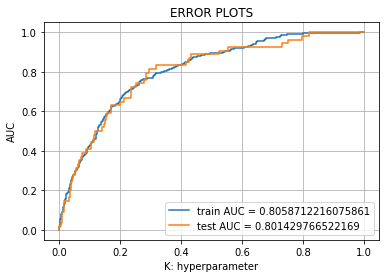

the maximum value of tpr*(1-fpr) 0.5540615401876499 for threshold 0.078
Model test Accuracy score is :  0.7578558225508318
Model test Recall score is :  0.6666666666666666
Model test Precision score is :  0.24161073825503357
Model test F1 score is :  0.35467980295566504
Model test AUC score is :  0.801429766522169


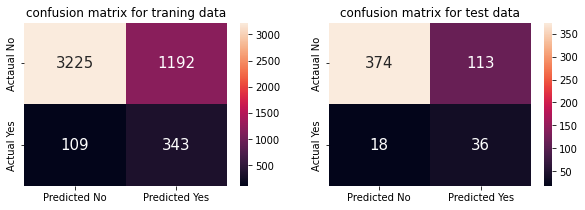

In [ ]:
model_f1_score, model_AUC_score = model_performence_check(logreg2,X_train,X_test,y_train,y_test)

### Model 2: Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(class_weight = 'balanced')

parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10,20, 45, 75, 100, 135, 270, 500]}

DT_model_CV = GridSearchCV(DT_model, parameters, cv=5, scoring='f1', n_jobs=-1, return_train_score=True, verbose=10)
DT_model_CV = DT_model_CV.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",DT_model_CV.best_params_)
print("f1 :",DT_model_CV.best_score_)

Fitting 5 folds for each of 63 candidates, totalling 315 fits
tuned hpyerparameters :(best parameters)  {'max_depth': 10, 'min_samples_split': 5}
f1 : 0.43577433773681273


In [ ]:
# model with best hyperparameters:
DT_model2 = DecisionTreeClassifier(class_weight = 'balanced', max_depth = 10, min_samples_split = 5)
DT_model2=DT_model2.fit(X_train,y_train)

print("score",DT_model2.score(X_test,y_test))

score 0.8502772643253235


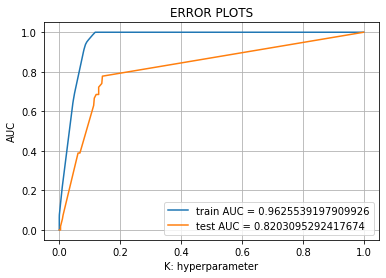

the maximum value of tpr*(1-fpr) 0.8820466379895857 for threshold 0.62
Model test Accuracy score is :  0.8502772643253235
Model test Recall score is :  0.7777777777777778
Model test Precision score is :  0.3783783783783784
Model test F1 score is :  0.5090909090909091
Model test AUC score is :  0.8203095292417674


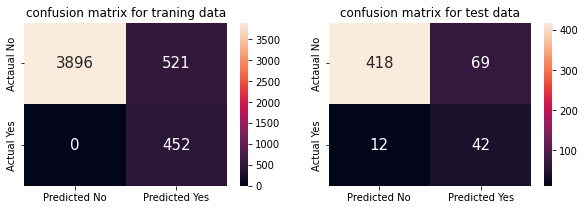

In [ ]:
model_f1_score, model_AUC_score = model_performence_check(DT_model2,X_train,X_test,y_train,y_test)

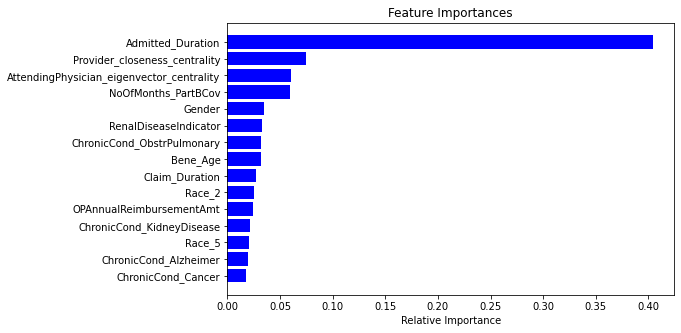

In [ ]:
features = X_train.columns
importances = DT_model2.feature_importances_
indices = (np.argsort(importances))[-15:]
plt.figure(figsize=(8,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Model 3: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(class_weight = 'balanced', random_state=42)

param_grid = { 
    'n_estimators': [300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


RF_CV = GridSearchCV(estimator=RF, param_grid=param_grid, cv= 5,scoring='f1', n_jobs=-1, return_train_score=True, verbose=10)
RF_CV.fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ",RF_CV.best_params_)
print("f1 :",RF_CV.best_score_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}
f1 : 0.527774174386609


In [ ]:
RF2 = RandomForestClassifier(n_estimators = 500,max_features='auto',max_depth=8,criterion='gini',
                             class_weight = 'balanced',n_jobs=-1,verbose=10, random_state=42)

RF2=RF2.fit(X_train,y_train)

print("score",RF2.score(X_test,y_test))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.1s


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500building tree 8 of 500

building tree 9 of 500
building tree 10 of 500building tree 11 of 500
building tree 12 of 500

building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500building tree 32 of 500

building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500building tree 39 of 500

building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    0.2s



building tree 45 of 500
building tree 46 of 500building tree 47 of 500

building tree 48 of 500
building tree 49 of 500
building tree 50 of 500building tree 51 of 500

building tree 52 of 500
building tree 53 of 500
building tree 54 of 500
building tree 55 of 500building tree 56 of 500

building tree 57 of 500
building tree 58 of 500building tree 59 of 500
building tree 60 of 500

building tree 61 of 500building tree 62 of 500
building tree 63 of 500

building tree 64 of 500
building tree 65 of 500
building tree 66 of 500
building tree 67 of 500
building tree 68 of 500
building tree 69 of 500
building tree 70 of 500
building tree 71 of 500building tree 72 of 500

building tree 73 of 500
building tree 74 of 500
building tree 75 of 500
building tree 76 of 500
building tree 77 of 500
building tree 78 of 500building tree 79 of 500

building tree 80 of 500
building tree 81 of 500
building tree 82 of 500building tree 83 of 500

building tree 84 of 500
building tree 85 of 500
building tree 8

[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.4s


building tree 129 of 500
building tree 130 of 500
building tree 131 of 500
building tree 132 of 500
building tree 133 of 500
building tree 134 of 500
building tree 135 of 500
building tree 136 of 500
building tree 137 of 500building tree 138 of 500

building tree 139 of 500
building tree 140 of 500
building tree 141 of 500
building tree 142 of 500
building tree 143 of 500
building tree 144 of 500
building tree 145 of 500building tree 146 of 500

building tree 147 of 500building tree 148 of 500
building tree 149 of 500

building tree 150 of 500
building tree 151 of 500
building tree 152 of 500
building tree 153 of 500
building tree 154 of 500
building tree 155 of 500
building tree 156 of 500
building tree 157 of 500
building tree 158 of 500
building tree 159 of 500building tree 160 of 500

building tree 161 of 500
building tree 162 of 500building tree 163 of 500

building tree 164 of 500
building tree 165 of 500
building tree 166 of 500
building tree 167 of 500


[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:    0.7s


building tree 168 of 500building tree 169 of 500

building tree 170 of 500
building tree 171 of 500
building tree 172 of 500
building tree 173 of 500
building tree 174 of 500
building tree 175 of 500
building tree 176 of 500
building tree 177 of 500
building tree 178 of 500
building tree 179 of 500
building tree 180 of 500
building tree 181 of 500building tree 182 of 500

building tree 183 of 500
building tree 184 of 500building tree 185 of 500

building tree 186 of 500building tree 187 of 500

building tree 188 of 500
building tree 189 of 500
building tree 190 of 500
building tree 191 of 500
building tree 192 of 500
building tree 193 of 500
building tree 194 of 500
building tree 195 of 500
building tree 196 of 500building tree 197 of 500
building tree 198 of 500

building tree 199 of 500
building tree 200 of 500
building tree 201 of 500
building tree 202 of 500
building tree 203 of 500
building tree 204 of 500
building tree 205 of 500building tree 206 of 500

building tree 207 of 500


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:    0.9s



building tree 215 of 500
building tree 216 of 500
building tree 217 of 500
building tree 218 of 500
building tree 219 of 500
building tree 220 of 500
building tree 221 of 500
building tree 222 of 500
building tree 223 of 500
building tree 224 of 500building tree 225 of 500

building tree 226 of 500
building tree 227 of 500
building tree 228 of 500
building tree 229 of 500building tree 230 of 500

building tree 231 of 500
building tree 232 of 500
building tree 233 of 500building tree 234 of 500
building tree 235 of 500
building tree 236 of 500

building tree 237 of 500
building tree 238 of 500
building tree 239 of 500
building tree 240 of 500
building tree 241 of 500
building tree 242 of 500building tree 243 of 500

building tree 244 of 500
building tree 245 of 500
building tree 246 of 500
building tree 247 of 500
building tree 248 of 500


[Parallel(n_jobs=-1)]: Done 226 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 249 tasks      | elapsed:    1.1s


building tree 249 of 500
building tree 250 of 500building tree 251 of 500
building tree 252 of 500

building tree 253 of 500
building tree 254 of 500
building tree 255 of 500
building tree 256 of 500
building tree 257 of 500
building tree 258 of 500
building tree 259 of 500
building tree 260 of 500
building tree 261 of 500
building tree 262 of 500
building tree 263 of 500
building tree 264 of 500
building tree 265 of 500
building tree 266 of 500
building tree 267 of 500building tree 268 of 500

building tree 269 of 500building tree 270 of 500

building tree 271 of 500
building tree 272 of 500building tree 273 of 500

building tree 274 of 500
building tree 275 of 500
building tree 276 of 500
building tree 277 of 500
building tree 278 of 500
building tree 279 of 500
building tree 280 of 500
building tree 281 of 500
building tree 282 of 500
building tree 283 of 500
building tree 284 of 500
building tree 285 of 500
building tree 286 of 500
building tree 287 of 500
building tree 288 of 500


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 297 tasks      | elapsed:    1.3s


building tree 295 of 500
building tree 296 of 500
building tree 297 of 500building tree 298 of 500

building tree 299 of 500
building tree 300 of 500
building tree 301 of 500
building tree 302 of 500
building tree 303 of 500
building tree 304 of 500
building tree 305 of 500
building tree 306 of 500
building tree 307 of 500
building tree 308 of 500building tree 309 of 500

building tree 310 of 500
building tree 311 of 500
building tree 312 of 500
building tree 313 of 500
building tree 314 of 500
building tree 315 of 500building tree 316 of 500building tree 317 of 500

building tree 318 of 500

building tree 319 of 500
building tree 320 of 500
building tree 321 of 500
building tree 322 of 500
building tree 323 of 500
building tree 324 of 500
building tree 325 of 500
building tree 326 of 500
building tree 327 of 500
building tree 328 of 500
building tree 329 of 500
building tree 330 of 500
building tree 331 of 500
building tree 332 of 500
building tree 333 of 500
building tree 334 of 500b

[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:    1.5s


building tree 338 of 500
building tree 339 of 500
building tree 340 of 500
building tree 341 of 500
building tree 342 of 500
building tree 343 of 500building tree 344 of 500

building tree 345 of 500
building tree 346 of 500
building tree 347 of 500
building tree 348 of 500
building tree 349 of 500
building tree 350 of 500
building tree 351 of 500
building tree 352 of 500
building tree 353 of 500
building tree 354 of 500
building tree 355 of 500
building tree 356 of 500building tree 357 of 500

building tree 358 of 500
building tree 359 of 500
building tree 360 of 500
building tree 361 of 500
building tree 362 of 500
building tree 363 of 500
building tree 364 of 500
building tree 365 of 500
building tree 366 of 500
building tree 367 of 500
building tree 368 of 500
building tree 369 of 500
building tree 370 of 500building tree 371 of 500

building tree 372 of 500
building tree 373 of 500
building tree 374 of 500
building tree 375 of 500
building tree 376 of 500
building tree 377 of 500


[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 405 tasks      | elapsed:    1.8s


building tree 387 of 500
building tree 388 of 500
building tree 389 of 500
building tree 390 of 500building tree 391 of 500

building tree 392 of 500
building tree 393 of 500
building tree 394 of 500building tree 395 of 500

building tree 396 of 500
building tree 397 of 500
building tree 398 of 500
building tree 399 of 500
building tree 400 of 500
building tree 401 of 500
building tree 402 of 500building tree 403 of 500

building tree 404 of 500
building tree 405 of 500
building tree 406 of 500
building tree 407 of 500
building tree 408 of 500
building tree 409 of 500
building tree 410 of 500
building tree 411 of 500
building tree 412 of 500
building tree 413 of 500
building tree 414 of 500
building tree 415 of 500building tree 416 of 500

building tree 417 of 500
building tree 418 of 500
building tree 419 of 500
building tree 420 of 500
building tree 421 of 500
building tree 422 of 500
building tree 423 of 500
building tree 424 of 500
building tree 425 of 500
building tree 426 of 500


[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 465 tasks      | elapsed:    2.1s


building tree 457 of 500
building tree 458 of 500
building tree 459 of 500
building tree 460 of 500
building tree 461 of 500
building tree 462 of 500
building tree 463 of 500
building tree 464 of 500
building tree 465 of 500
building tree 466 of 500
building tree 467 of 500building tree 468 of 500

building tree 469 of 500
building tree 470 of 500
building tree 471 of 500
building tree 472 of 500
building tree 473 of 500
building tree 474 of 500
building tree 475 of 500building tree 476 of 500

building tree 477 of 500
building tree 478 of 500building tree 479 of 500

building tree 480 of 500
building tree 481 of 500
building tree 482 of 500
building tree 483 of 500
building tree 484 of 500
building tree 485 of 500
building tree 486 of 500
building tree 487 of 500
building tree 488 of 500
building tree 489 of 500
building tree 490 of 500building tree 491 of 500building tree 492 of 500building tree 493 of 500



building tree 494 of 500building tree 495 of 500

building tree 496 of 500


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    

score 0.8817005545286506


[Parallel(n_jobs=8)]: Done 226 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 297 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 322 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 376 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 405 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 465 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Para

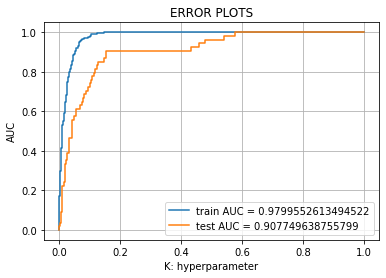

the maximum value of tpr*(1-fpr) 0.8939255210660342 for threshold 0.524
Model test Accuracy score is :  0.8909426987060998
Model test Recall score is :  0.6851851851851852
Model test Precision score is :  0.46835443037974683
Model test F1 score is :  0.5563909774436091
Model test AUC score is :  0.907749638755799


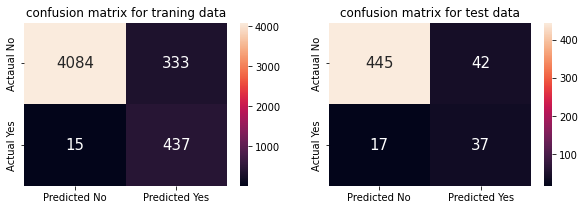

In [ ]:
model_f1_score, model_AUC_score = model_performence_check(RF2,X_train,X_test,y_train,y_test)

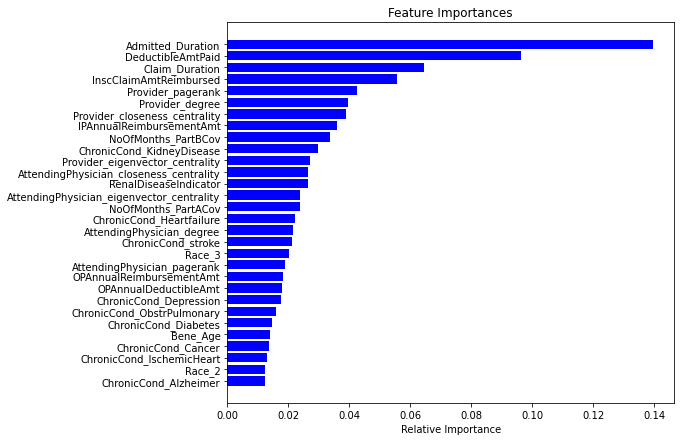

In [ ]:
features = X_train.columns
importances = RF2.feature_importances_
indices = (np.argsort(importances))[-30:]
plt.figure(figsize=(8,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Model 4: Xg_Boost

In [ ]:
import xgboost as xgb

from sklearn.model_selection import RandomizedSearchCV

XGB = xgb.XGBClassifier()

parameters = {"eta" : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3] , "n_estimators" : [5,10,50, 75, 100], "scale_pos_weight": [0.2,1,2,5,10]}

XGB_CV = RandomizedSearchCV(XGB, parameters , cv=5, scoring='f1', n_jobs=-1,return_train_score=True, verbose=10)
XGB_CV.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",XGB_CV.best_params_)
print("f1 :",XGB_CV.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
tuned hpyerparameters :(best parameters)  {'scale_pos_weight': 10, 'n_estimators': 75, 'eta': 0.3}
f1 : 0.5196515875220575


In [ ]:
XGB2 = xgb.XGBClassifier(eta=0.3,n_estimators=75,n_jobs=-1,scale_pos_weight=10)

XGB2=XGB2.fit(X_train,y_train)

print("score",XGB2.score(X_test,y_test))

score 0.9149722735674677


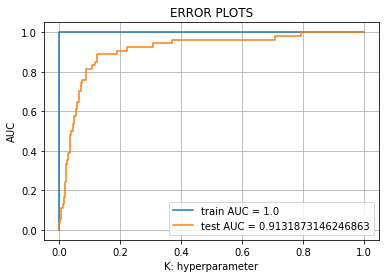

the maximum value of tpr*(1-fpr) 1.0 for threshold 0.977
Model test Accuracy score is :  0.9038817005545287
Model test Recall score is :  0.05555555555555555
Model test Precision score is :  0.75
Model test F1 score is :  0.10344827586206895
Model test AUC score is :  0.9131873146246863


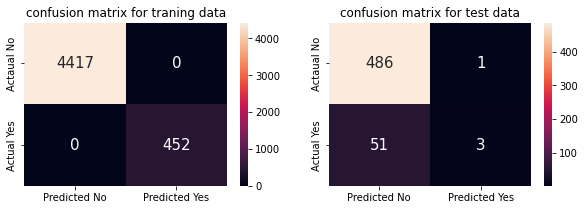

In [ ]:
model_f1_score, model_AUC_score = model_performence_check(XGB2,X_train,X_test,y_train,y_test)

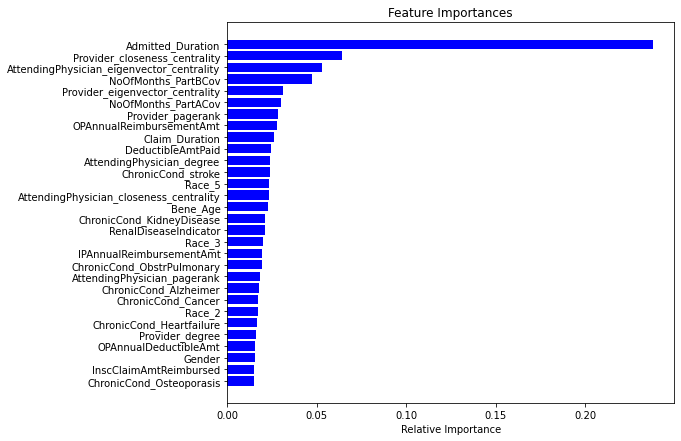

In [ ]:
features = X_train.columns
importances = XGB2.feature_importances_
indices = (np.argsort(importances))[-30:]
plt.figure(figsize=(8,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()